In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [11]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\data science\3. Multi Linear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

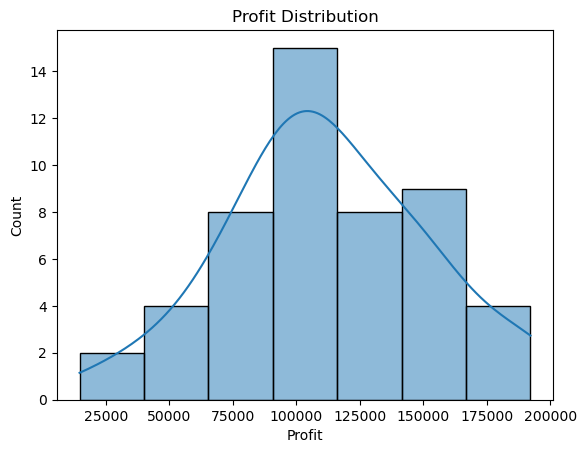

In [13]:
# Profit Distribution
sns.histplot(df['Profit'], kde=True)
plt.title("Profit Distribution")
plt.show()

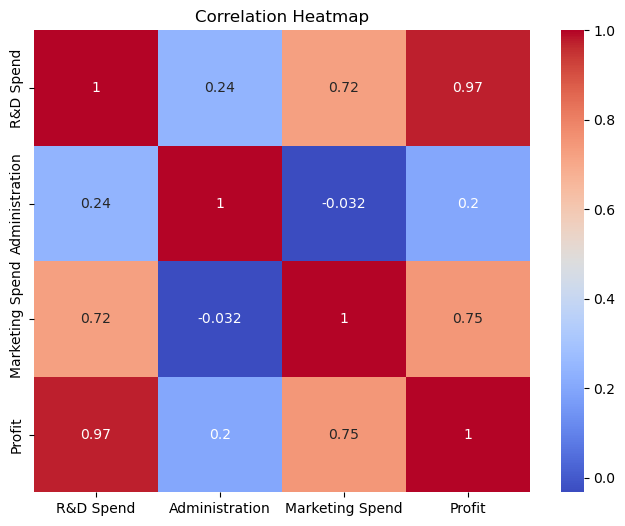

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


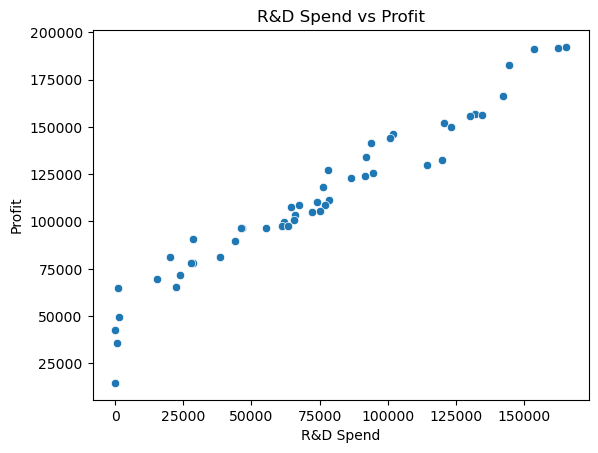

In [15]:
# Profit vs R&D Spend
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title("R&D Spend vs Profit")
plt.show()


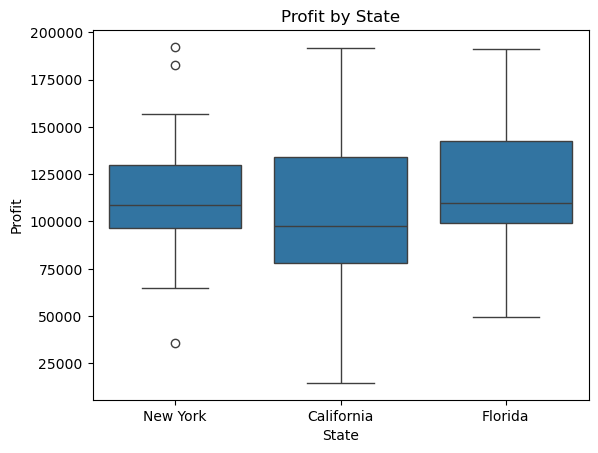

In [16]:
# Profit by state
sns.boxplot(x='State', y='Profit', data=df)
plt.title("Profit by State")
plt.show()


In [17]:
# Data processing
# convert categorical variables(states) to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [27]:
#Defining x y
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']


In [26]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
# multiple linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
r2_model1 = r2_score(y_test, y_pred1)
r2_model1



0.8987266414328636

In [21]:
# log transformation model
y_log = np.log(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)
r2_model2 = r2_score(y_test2, y_pred2)
r2_model2


0.7013203713256264

In [22]:
# comparision with R2
r2_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Log-Transformed Profit'],
    'R2 Score': [r2_model1, r2_model2]
})

r2_table


,Model,R2 Score
0,Linear Regression,0.898727
1,Log-Transformed Profit,0.701320


In [25]:
# Final model
final_model = model1  # model with highest R²


In [24]:
# New Value Prediction
new_data = pd.DataFrame({
    'R&D Spend': [120000, 90000, 150000],
    'Administration': [110000, 120000, 130000],
    'Marketing Spend': [300000, 250000, 400000],
    'State_Florida': [1, 0, 0],
    'State_New York': [0, 1, 0]
})

predictions = final_model.predict(new_data)

output = new_data.copy()
output['Predicted Profit'] = predictions

output.to_csv('50_startups_predicted_profit.csv', index=False)
output


,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Predicted Profit
0,120000,110000,300000,1,0,153032.406072
1,90000,120000,250000,0,1,125751.047945
2,150000,130000,400000,0,0,177872.301624


# Key Findings
R&D Spend is the strongest driver of profit
Marketing Spend has moderate impact
Administration has minimal impact
State shows minor influence
Multiple Linear Regression performed well
Log transformation did not significantly improve R²

# Best Model
Multiple Linear Regression without transformation